[*********************100%***********************]  1 of 1 completed


Tesla Stock Data (First 5 Rows):
Price        Date Adj Close     Close      High       Low      Open     Volume
Ticker                 TSLA      TSLA      TSLA      TSLA      TSLA       TSLA
0      2010-06-29  1.592667  1.592667  1.666667  1.169333  1.266667  281494500
1      2010-06-30  1.588667  1.588667  2.028000  1.553333  1.719333  257806500
2      2010-07-01  1.464000  1.464000  1.728000  1.351333  1.666667  123282000
3      2010-07-02  1.280000  1.280000  1.540000  1.247333  1.533333   77097000
4      2010-07-06  1.074000  1.074000  1.333333  1.055333  1.333333  103003500


C:\Users\Fafcom Technology\AppData\Local\Temp\ipykernel_1328\2094554457.py:24: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]



Tesla Revenue Data (Last 5 Rows):
          Date Revenue
59  2010-06-30      28
60  2010-03-31      21
61  2009-12-31     NaN
62  2009-09-30      46
63  2009-06-30      27


[*********************100%***********************]  1 of 1 completed



GameStop Stock Data (First 5 Rows):
Price        Date Adj Close   Close    High     Low    Open     Volume
Ticker                  GME     GME     GME     GME     GME        GME
0      2010-01-04  3.854643  5.7250  5.7375  5.5000  5.5175   26702800
1      2010-01-05  3.959005  5.8800  5.9350  5.7250  5.7275   21269600
2      2010-01-06  4.044850  6.0075  6.0250  5.8050  5.8650   21471200
3      2010-01-07  3.443929  5.1150  5.2925  4.8550  5.0025  164761200
4      2010-01-08  3.415315  5.0725  5.3075  5.0575  5.1600   47872400


C:\Users\Fafcom Technology\AppData\Local\Temp\ipykernel_1328\2094554457.py:24: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]



GameStop Revenue Data (Last 5 Rows):
          Date Revenue
61  2010-01-31    3524
62  2009-10-31    1835
63  2009-07-31    1739
64  2009-04-30    1981
65  2009-01-31    3492


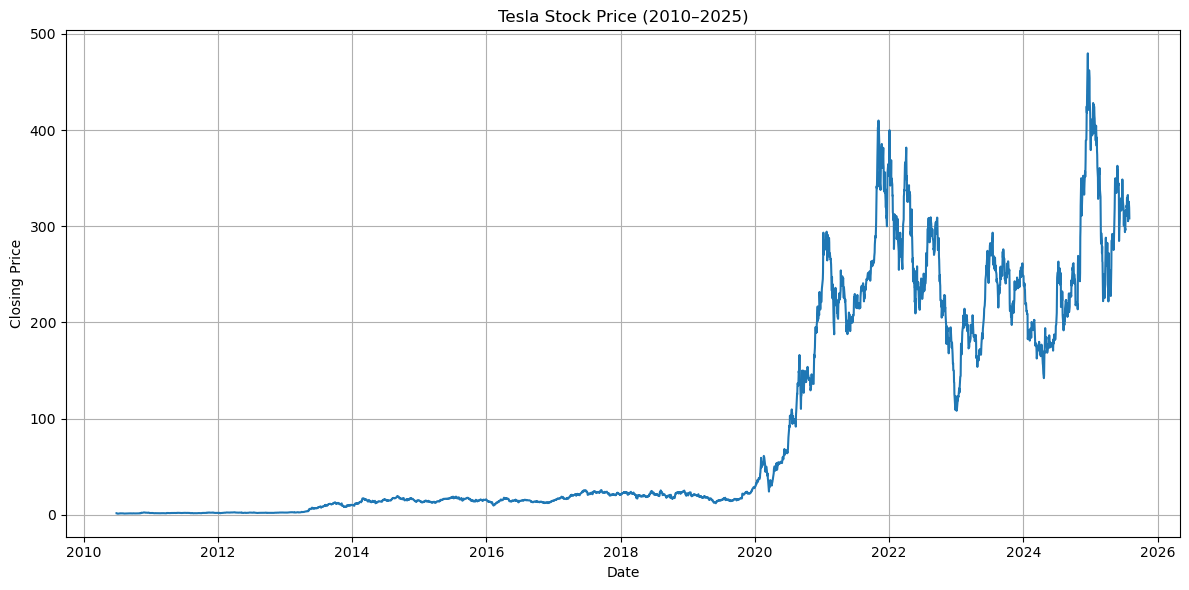

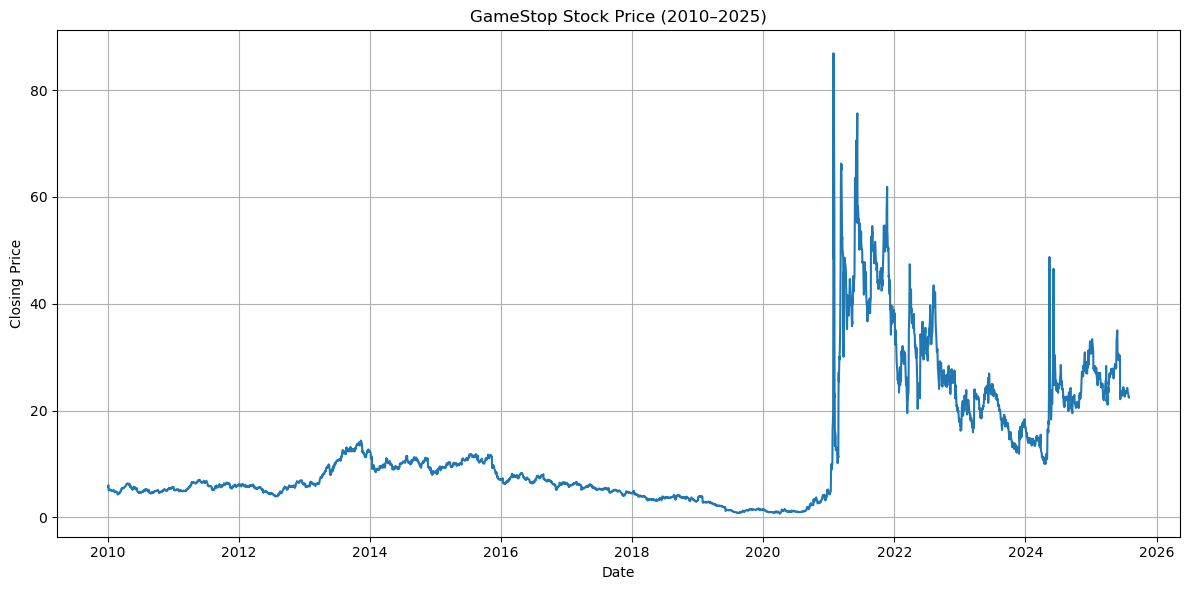

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time

# --------------- Setup Selenium ----------------
chrome_options = Options()
chrome_options.add_argument("--headless")  # run in background
driver = webdriver.Chrome(options=chrome_options)

def get_revenue_data_selenium(url, company_keyword):
    driver.get(url)
    time.sleep(5)  # wait for JS to load

    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    tables = soup.find_all("table")

    for table in tables:
        if company_keyword.lower() in str(table).lower():
            df = pd.read_html(str(table))[0]
            df.columns = ["Date", "Revenue"]
            df["Revenue"] = df["Revenue"].replace('[\$,]', '', regex=True)
            df = df[df["Revenue"] != ""]
            return df.reset_index(drop=True)

    return pd.DataFrame(columns=["Date", "Revenue"])

# --------------- Question 1: Tesla Stock ----------------
tesla_data = yf.download("TSLA", start="2010-01-01", end="2025-08-01", auto_adjust=False)
tesla_data.reset_index(inplace=True)
print("Tesla Stock Data (First 5 Rows):")
print(tesla_data.head())

# --------------- Question 2: Tesla Revenue ----------------
tesla_revenue = get_revenue_data_selenium("https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue", "Tesla Quarterly Revenue")
print("\nTesla Revenue Data (Last 5 Rows):")
print(tesla_revenue.tail())

# --------------- Question 3: GME Stock ----------------
gme_data = yf.download("GME", start="2010-01-01", end="2025-08-01", auto_adjust=False)
gme_data.reset_index(inplace=True)
print("\nGameStop Stock Data (First 5 Rows):")
print(gme_data.head())

# --------------- Question 4: GME Revenue ----------------
gme_revenue = get_revenue_data_selenium("https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue", "GameStop Quarterly Revenue")
print("\nGameStop Revenue Data (Last 5 Rows):")
print(gme_revenue.tail())

# --------------- Question 5: Tesla Stock Graph ----------------
def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data["Date"], data["Close"])
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

make_graph(tesla_data, "Tesla Stock Price (2010–2025)")

# --------------- Question 6: GME Stock Graph ----------------
make_graph(gme_data, "GameStop Stock Price (2010–2025)")

# Clean up browser
driver.quit()
